# Hudson County

[Hudson County] contains several of [the densest cities in the US](https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population_density). In the US, New York and Hudson Counties are the only counties where a majority of residents commute using public transit.

Below are some stats about household car ownership in Hudson County.

[Hudson County]: https://en.wikipedia.org/wiki/Hudson_County,_New_Jersey

In [1]:
from utz import *
from hhvs.plot_utils import *
from hhvs import plot_utils

In [2]:
chdir('../hudson')
subtitle = 'Hudson County municipalities, ACS 5yr 2021'
plot_kwargs = dict(subtitle=subtitle)
abs_plot = partial(plot_utils.abs_plot, **plot_kwargs)
pct_plot = partial(plot_utils.pct_plot, **plot_kwargs)

In [3]:
d = read_csv(f'acs2021_5yr_B08201_16000US3466570/acs2021_5yr_B08201_16000US3466570.csv')
d

,geoid,name,B08201001,"B08201001, Error",B08201002,"B08201002, Error",B08201003,"B08201003, Error",B08201004,"B08201004, Error",B08201005,"B08201005, Error",B08201006,"B08201006, Error",B08201007,"B08201007, Error",B08201008,"B08201008, Error",B08201009,"B08201009, Error",B08201010,"B08201010, Error",B08201011,"B08201011, Error",B08201012,"B08201012, Error",B08201013,"B08201013, Error",B08201014,"B08201014, Error",B08201015,"B08201015, Error",B08201016,"B08201016, Error",B08201017,"B08201017, Error",B08201018,"B08201018, Error",B08201019,"B08201019, Error",B08201020,"B08201020, Error",B08201021,"B08201021, Error",B08201022,"B08201022, Error",B08201023,"B08201023, Error",B08201024,"B08201024, Error",B08201025,"B08201025, Error",B08201026,"B08201026, Error",B08201027,"B08201027, Error",B08201028,"B08201028, Error",B08201029,"B08201029, Error",B08201030,"B08201030, Error"
0,06000US3401752470,"North Bergen township, Hudson County, NJ",23315,857,5522,708,10866,805,4877,648,1481,312,569,236,6566,848,2845,520,3602,566,119,112,0,31,0,31,6300,643,1254,388,3337,411,1608,377,52,57,49,56,3972,489,586,218,1809,344,1165,343,396,159,16,26,6477,490,837,279,2118,356,1985,422,1033,274,504,231
1,06000US3401777930,"Weehawken township, Hudson County, NJ",7565,412,1625,311,4159,434,1368,291,322,112,91,96,2741,438,854,211,1813,372,25,27,0,21,49,77,2665,401,396,138,1444,307,671,280,154,81,0,21,1167,273,349,198,493,138,252,102,73,59,0,21,992,156,26,31,409,163,420,100,95,58,42,59
2,16000US3403580,"Bayonne, NJ",27036,841,5836,540,11965,723,6877,570,1829,377,529,203,8157,832,3217,444,4583,646,324,132,33,36,0,31,7201,631,1459,317,3227,457,2290,369,206,90,19,22,5318,624,551,192,2150,385,2025,461,573,279,19,23,6360,414,609,161,2005,295,2238,342,1017,241,491,198
3,16000US3419360,"East Newark, NJ",883,114,277,81,279,121,280,80,47,27,0,13,92,43,65,43,18,16,0,13,9,13,0,13,216,66,79,45,67,36,70,44,0,13,0,13,272,118,46,44,127,104,99,49,0,13,0,13,303,84,87,55,67,46,111,64,38,24,0,13
4,16000US3428650,"Guttenberg, NJ",5033,388,1560,389,2209,361,1135,292,103,67,26,40,1768,374,711,230,991,290,66,62,0,21,0,21,1292,306,426,191,469,154,372,164,25,39,0,21,809,356,272,256,320,160,217,175,0,21,0,21,1164,262,151,96,429,140,480,270,78,56,26,40
5,16000US3430210,"Harrison, NJ",7888,391,2686,405,3468,509,1339,267,294,123,101,71,2437,459,974,236,1457,422,6,8,0,21,0,21,2486,395,915,310,1039,197,522,208,10,13,0,21,1526,316,474,287,483,151,424,132,89,56,56,57,1439,173,323,111,489,138,387,143,195,103,45,43
6,16000US3432250,"Hoboken, NJ",27932,504,9556,639,15459,667,2524,438,393,156,0,31,8939,689,4409,511,4492,534,24,21,14,20,0,31,11952,759,3479,454,6609,549,1794,415,70,50,0,31,4259,512,1121,233,2531,390,430,147,177,114,0,31,2782,298,547,170,1827,293,276,113,132,82,0,31
7,16000US3436000,"Jersey City, NJ",115654,1316,44541,1583,50015,1419,16119,1172,3953,675,1026,262,36036,1663,20602,1118,14678,1164,566,179,110,78,80,80,35246,1386,12261,843,16848,1105,5793,676,329,109,15,17,19254,1040,6346,716,8448,739,3304,554,966,240,190,121,25118,1057,5332,563,10041,789,6456,722,2548,598,741,197
8,16000US3436510,"Kearny, NJ",14294,522,1881,381,5488,560,4656,455,1526,265,743,200,2841,448,706,193,1702,339,381,186,35,36,17,25,4115,503,370,141,1867,398,1715,299,158,76,5,7,3138,352,343,134,1075,193,1214,271,457,129,49,40,4200,419,462,256,844,209,1346,183,876,217,672,195
9,16000US3466570,"Secaucus, NJ",8000,418,536,193,3505,452,2765,372,938,207,256,165,1769,335,324,160,1363,293,82,60,0,25,0,25,2805,400,131,96,1302,322,1265,308,99,73,8,26,1535,311,26,23,482,153,617,188,378,184,32,45,1891,256,55,41,358,146,801,273,461,139,216,153


## Households x Vehicles x Municipality

Source: [censusreporter.org].

[censusreporter.org]: https://censusreporter.org/data/table/?table=B08201&geo_ids=16000US3432250,160%7C05000US34017,06000US3401777930,06000US3401752470&primary_geo_id=16000US3432250

In [4]:
hhs = d.copy()
hhs['Municipality'] = hhs['name'].str.replace(', NJ$', '', regex=True).str.replace(' township, Hudson County$', '', regex=True)
hhs = hhs.set_index('Municipality')
columns = {
    'B08201001': 'Total',
    'B08201002': '0 vehicles',
    'B08201003': '1 vehicle',
    'B08201004': '2 vehicles',
    'B08201005': '3 vehicles',
    'B08201006': '4+ vehicles',
}
hhs = hhs.rename(columns=columns)[columns.values()]
hhs_totals0 = hhs.Total
hhs = hhs.drop(columns='Total')
hhs_totals = hhs.sum(1).rename('Total households')
assert all(hhs_totals == hhs_totals0)
hhst = sxs(hhs, hhs_totals).sort_values('Total households', ascending=False)
hhs_totals = hhst['Total households']
hhs = hhst.drop(columns='Total households')
hhs.columns = hhs.columns.copy()
hhs.columns.name = 'Household vehicles'
export(hhst, 'hh')

Saved parquet to .ire/hh.parquet


,0 vehicles,1 vehicle,2 vehicles,3 vehicles,4+ vehicles,Total households
Municipality,,,,,,
Jersey City,44541,50015,16119,3953,1026,115654
Hoboken,9556,15459,2524,393,0,27932
Bayonne,5836,11965,6877,1829,529,27036
Union City,9954,10815,3533,875,115,25292
North Bergen,5522,10866,4877,1481,569,23315
West New York,7595,9160,2545,532,108,19940
Kearny,1881,5488,4656,1526,743,14294
Secaucus,536,3505,2765,938,256,8000
Harrison,2686,3468,1339,294,101,7888


In [5]:
hhs_totals.sum()

282832

### Household Vehicle Ownership – Percentages by Municipality

In [6]:
hhs_pcts = hhs.div(hhs_totals, axis=0).sort_values('0 vehicles', ascending=False)
hhs_pcts.columns = ['0', '1', '2', '3', '4+']
hhs_pcts.columns.name = 'Household vehicles'
export(round(hhs_pcts * 100, 1), 'hh_pct')

Saved parquet to .ire/hh_pct.parquet


Household vehicles,0,1,2,3,4+
Municipality,,,,,
Union City,39.4,42.8,14.0,3.5,0.5
Jersey City,38.5,43.2,13.9,3.4,0.9
West New York,38.1,45.9,12.8,2.7,0.5
Hoboken,34.2,55.3,9.0,1.4,0.0
Harrison,34.1,44.0,17.0,3.7,1.3
East Newark,31.4,31.6,31.7,5.3,0.0
Guttenberg,31.0,43.9,22.6,2.0,0.5
North Bergen,23.7,46.6,20.9,6.4,2.4
Bayonne,21.6,44.3,25.4,6.8,2.0


Saved plotly to .ire/households_by_vehicle_count.json


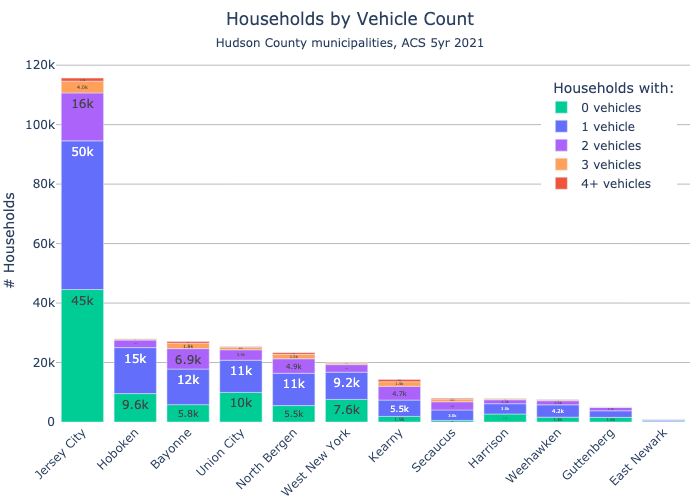

In [7]:
abs_plot(
    hhs,
    melt='# Households',
    title='Households by Vehicle Count',
    legend=ur_legend('  Households with:'),
    name='households_by_vehicle_count',
)

Saved plotly to .ire/households_by_vehicle_count_pcts.json


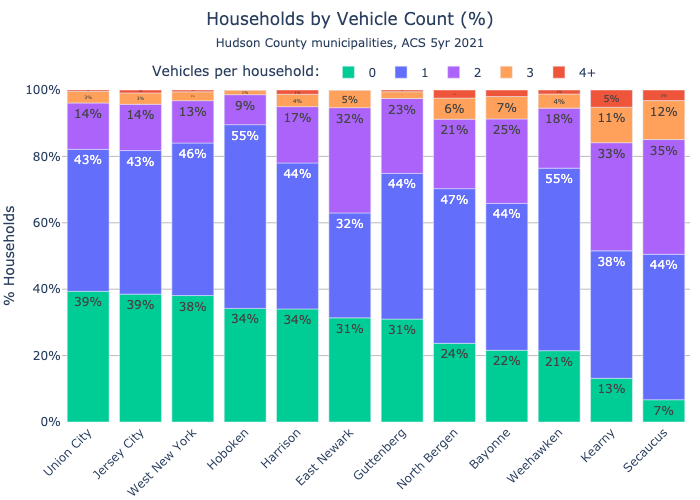

In [8]:
pct_plot(
    hhs_pcts,
    melt='% Households',
    title='Households by Vehicle Count (%)',
    name='households_by_vehicle_count_pcts',
)

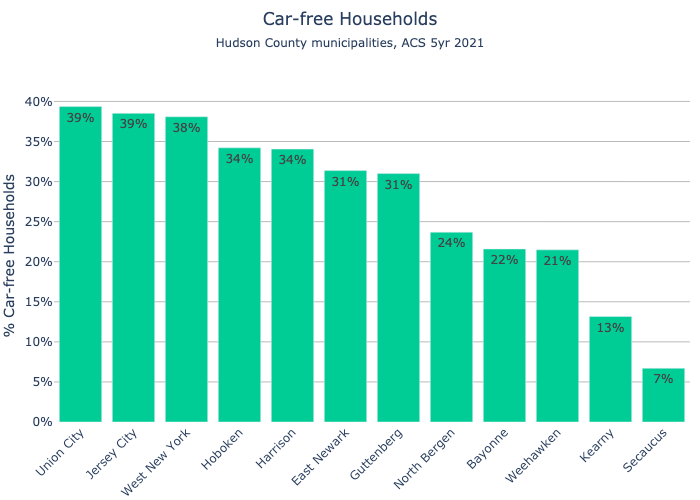

In [9]:
plot(
    hhs_pcts[['0']],
    melt='% Car-free Households',
    title='Car-free Households',
    subtitle=subtitle,
    pct=True,
    yrange=None,
    layout=dict(**pct_layout, showlegend=False),
    name='car_free_households',
    export=False,
)

In [10]:
columns = {
    '1 vehicle': '1-vehicle households',
    '2 vehicles': '2-vehicle households',
    '3 vehicles': '3-vehicle households',
    '4+ vehicles': '4+-vehicle households',
}
vhs = hhs.copy().rename(columns=columns)[columns.values()]
for i in range(1, 5):
    s = '4+' if i == 4 else f'{i}'
    col = f'{s}-vehicle households'
    vhs[col] *= i
vhs_totals = vhs.sum(1).rename('Total vehicles')
vhst = sxs(vhs, vhs_totals).sort_values('Total vehicles', ascending=False)
vhs = vhst.drop(columns='Total vehicles')
vhs.columns = vhs.columns.copy()
vhs.columns.name = 'Household vehicles'
vhs

Household vehicles,1-vehicle households,2-vehicle households,3-vehicle households,4+-vehicle households
Municipality,,,,
Jersey City,50015,32238,11859,4104
Bayonne,11965,13754,5487,2116
North Bergen,10866,9754,4443,2276
Kearny,5488,9312,4578,2972
Hoboken,15459,5048,1179,0
Union City,10815,7066,2625,460
West New York,9160,5090,1596,432
Secaucus,3505,5530,2814,1024
Weehawken,4159,2736,966,364


Saved plotly to .ire/vehicles_by_household_count.json


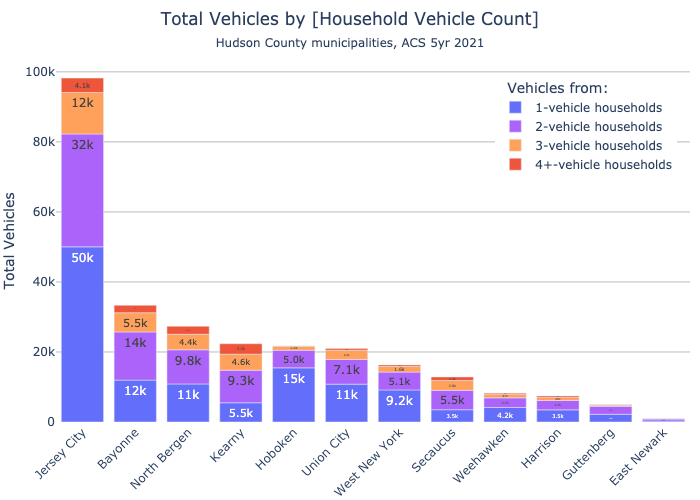

In [11]:
abs_plot(
    vhs,
    melt='Total Vehicles',
    title='Total Vehicles by [Household Vehicle Count]',
    colors=default_colors[1:],
    legend=ur_legend('  Vehicles from:'),
    name='vehicles_by_household_count',
)

In [12]:
vhs_pcts = vhs.div(vhs_totals, axis=0).sort_values('1-vehicle households', ascending=False)
vhs_pcts.columns = ['1', '2', '3', '4+']
vhs_pcts.columns.name = '# vehicles'
vhs_pcts

# vehicles,1,2,3,4+
Municipality,,,,
Hoboken,0.712856,0.232777,0.054367,0.000000
West New York,0.562723,0.312692,0.098046,0.026539
Union City,0.515835,0.337022,0.125203,0.021940
Jersey City,0.509235,0.328236,0.120744,0.041785
Weehawken,0.505653,0.332644,0.117447,0.044255
Harrison,0.466631,0.360334,0.118676,0.054360
Guttenberg,0.451554,0.464023,0.063164,0.021259
North Bergen,0.397454,0.356780,0.162515,0.083251
Bayonne,0.359072,0.412760,0.164666,0.063502


Saved plotly to .ire/vehicles_by_household_count_pcts.json


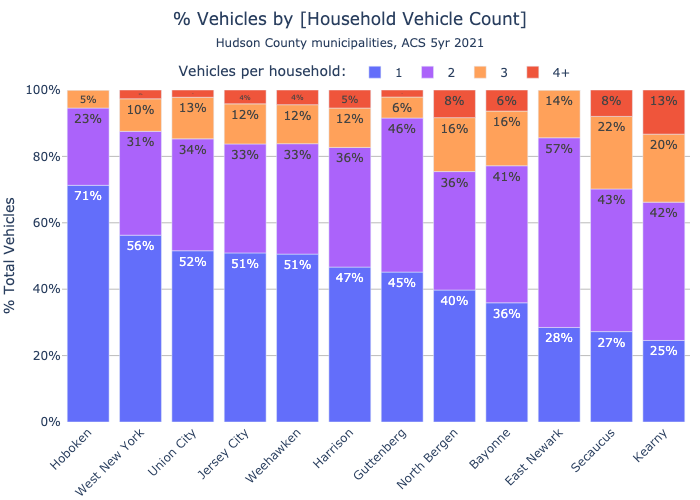

In [13]:
pct_plot(
    vhs_pcts,
    melt='% Total Vehicles',
    title='% Vehicles by [Household Vehicle Count]',
    colors=colors[1:],
    name='vehicles_by_household_count_pcts',
)